In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset in Google Drive
train_dir = '/content/drive/MyDrive/MY_data/train'
test_dir = '/content/drive/MyDrive/MY_data/test'

# Image data generators for data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Import necessary modules from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 10 classes (for 10 fruits)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,652,490 (25.38 MB)

 Trainable params: 6,652,490 (25.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 662s 9s/step - accuracy: 0.1856 - loss: 2.1400 - val_accuracy: 0.3301 - val_loss: 1.8097
Epoch 2/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:21 1s/step - accuracy: 0.2812 - loss: 1.6310

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2812 - loss: 1.6310 - val_accuracy: 1.0000 - val_loss: 0.0857
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.3947 - loss: 1.5997 - val_accuracy: 0.3740 - val_loss: 1.6633
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.4688 - loss: 1.4336 - val_accuracy: 1.0000 - val_loss: 1.2242
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.4492 - loss: 1.4605 - val_accuracy: 0.4502 - val_loss: 1.6135
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4375 - loss: 1.3058 - val_accuracy: 0.0000e+00 - val_loss: 2.2396
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 983ms/step - accuracy: 0.5073 - loss: 1.3307 - val_accuracy: 0.4600 - val_loss: 1.6786
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4688 - loss: 1.5518 - val_accuracy: 0.0000e+00 - val_loss: 1.7561
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 981ms/step - accuracy: 0.5825 - loss: 1.1976 - val_accuracy: 0.3975 - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.4754 - loss: 1.7466
Test Accuracy: 49.12%


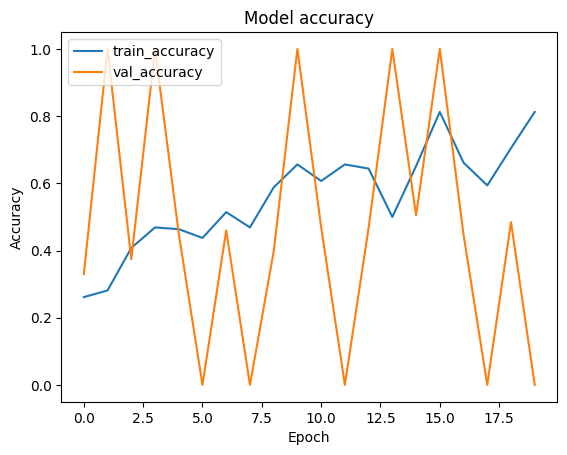

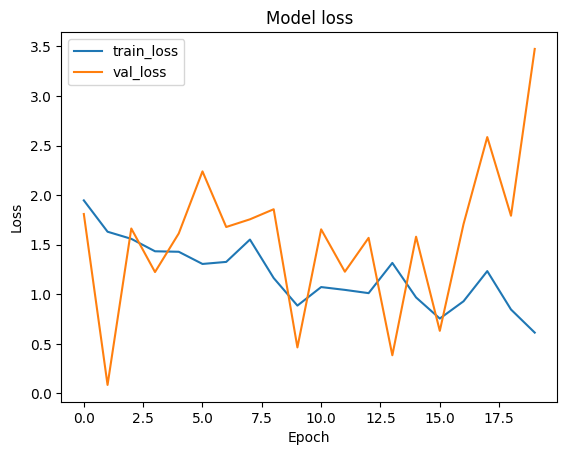

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss over time
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image for prediction
img_path = '/content/drive/MyDrive/MY_data/predict/0.jpeg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted class: 8


In [ ]:
!wget https://storage.googleapis.com/kaggle-data-sets/2026/1919/fruits-360.zip
!unzip fruits-360.zip


--2024-10-09 02:43:46--  https://storage.googleapis.com/kaggle-data-sets/2026/1919/fruits-360.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-10-09 02:43:46 ERROR 403: Forbidden.

unzip:  cannot find or open fruits-360.zip, fruits-360.zip.zip or fruits-360.zip.ZIP.


In [ ]:
model.save('fruit_classification_model.h5')
